In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

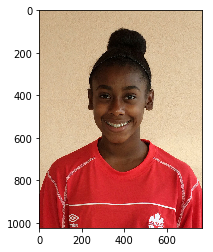

In [2]:
ori = io.imread("data/images/00602.jpg")
plt.imshow(ori)

In [3]:
ori.shape

(1024, 768, 3)

In [4]:
cropped = ori[0:998, 9:758, :]
cropped.shape

(998, 749, 3)

In [5]:
import scipy.io

In [6]:
mask_file = scipy.io.loadmat("data/images_mask/00602_mask.mat")

In [7]:
mask_file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Aug 11 23:37:23 2015',
 '__version__': '1.0',
 '__globals__': [],
 'mask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)}

In [8]:
mask = mask_file["mask"]
mask.shape

(800, 600)

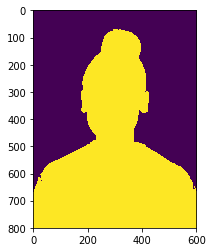

In [9]:
plt.imshow(mask)

In [10]:
import skimage

C:\Users\cychien\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\cychien\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


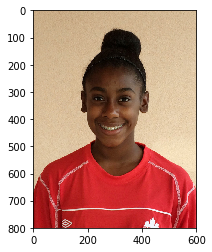

In [11]:
resized = skimage.transform.resize(cropped, (800, 600))
plt.imshow(resized)

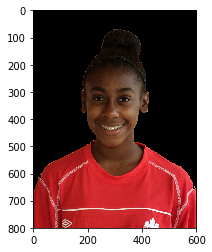

In [12]:
masked = resized * np.expand_dims(mask, axis=-1)
plt.imshow(masked)

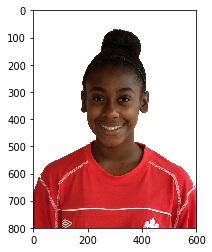

In [13]:
white_masked = np.where(np.expand_dims(mask, axis=-1) == 1, resized, np.ones((800, 600, 3)))
plt.imshow(white_masked)

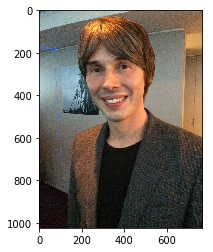

In [14]:
img2 = io.imread("http://farm6.static.flickr.com/5474/10041446846_49d351873d_b.jpg")
plt.imshow(img2)

In [15]:
urls = np.loadtxt("data/alldata_urls.txt", dtype=str)

In [16]:
urls.shape

(1885, 2)

In [17]:
urls[:10]

array([['00001.jpg',
        'http://farm6.static.flickr.com/5474/10041446846_49d351873d_b.jpg'],
       ['00002.jpg',
        'http://farm6.static.flickr.com/5349/10071117213_8ba4d8dc38_b.jpg'],
       ['00003.jpg',
        'http://farm3.static.flickr.com/2894/10073378065_219389c48b_b.jpg'],
       ['00004.jpg',
        'http://farm3.static.flickr.com/2858/10076862626_939899417a_b.jpg'],
       ['00005.jpg',
        'http://farm4.static.flickr.com/3734/10163480354_a2a057641b_b.jpg'],
       ['00006.jpg',
        'http://farm4.static.flickr.com/3786/10174196954_6b8c8a534a_b.jpg'],
       ['00007.jpg',
        'http://farm8.static.flickr.com/7363/10249939304_800ac1f40d_b.jpg'],
       ['00008.jpg',
        'http://farm3.static.flickr.com/2844/10250152423_bf71b72a3c_b.jpg'],
       ['00009.jpg',
        'http://farm6.static.flickr.com/5475/10353781723_dd98520c34_b.jpg'],
       ['00010.jpg',
        'http://farm6.static.flickr.com/5538/10369981764_5dd4d178fd_b.jpg']],
      dtype='<U65')

In [18]:
import face_alignment

In [19]:
detector = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device="cuda")

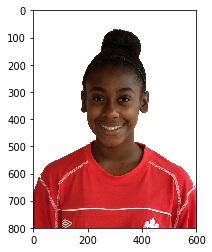

In [25]:
plt.imshow(white_masked)

In [38]:
detected_faces = detector.face_detector.detect_from_image(cropped.copy())
detected_faces

[array([242.63232, 273.85272, 492.77856, 617.2566 ,   1.     ],
       dtype=float32)]

In [60]:
face_region = detected_faces[0][:4].reshape((2, 2))
face_region

array([[242.63232, 273.85272],
       [492.77856, 617.2566 ]], dtype=float32)

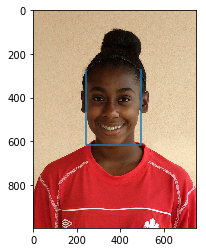

In [61]:
plt.imshow(cropped)
plt.plot([face_region[0][0], face_region[0][0], face_region[1][0], face_region[1][0]], 
         [face_region[0][1], face_region[1][1], face_region[1][1], face_region[0][1]])

In [62]:
cropped.shape, resized.shape

((998, 749, 3), (800, 600, 3))

In [63]:
resized_region = face_region * np.array([600/749, 800/998])
resized_region

array([[194.36501273, 219.52122017],
       [394.74918381, 494.79486316]])

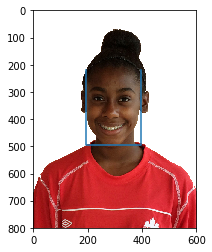

In [64]:
plt.imshow(white_masked)
plt.plot([resized_region[0][0], resized_region[0][0], resized_region[1][0], resized_region[1][0]], 
         [resized_region[0][1], resized_region[1][1], resized_region[1][1], resized_region[0][1]])

In [67]:
x1, y1, x2, y2 = resized_region.astype(int).flatten()
x1, y1, x2, y2

(194, 219, 394, 494)

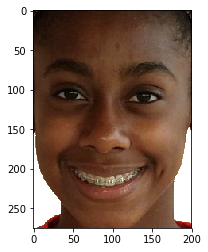

In [68]:
plt.imshow(white_masked[y1:y2, x1:x2, :])

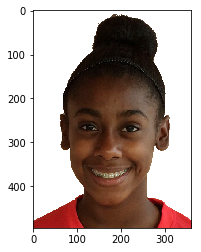

In [79]:
w = int((x2 - x1) * 1.8)
h = int((y2 - y1) * 1.8)
ox = int(((x1 + x2) - w) / 2)
oy = int(((y1 + y2) - 1.2 * h) / 2)
plt.imshow(white_masked[oy:oy+h, ox:ox+w, :])

In [81]:
crop_file = np.loadtxt("data/crop.txt", dtype=str)
crop_file.shape

(1759, 5)

In [89]:
index = list(map(lambda x: int(x.replace(".jpg", "")), crop_file[:, 0]))
index[:5]

[602, 642, 473, 2290, 2196]

In [90]:
sorted_index = np.argsort(index)
sorted_index[:5]

array([ 452,  659, 1058,  848, 1608], dtype=int64)

In [93]:
urls[0, 0]

'00001.jpg'

In [94]:
def find_region(label):
    for i, row in enumerate(crop_file):
        if row[0] == label:
            return i
    return -1

In [97]:
find_region(urls[0, 0])

452